In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv('ratings.csv')
df_movie = pd.read_csv('movies.csv')
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


1 Transforming Data (5 pts)
The ratings.csv file contains user ratings, one movie per line. See the README file for
more information.
Transform the data into a user-movie ratings matrix. There should be 610 rows (one
for each user) and 9,742 columns (one for each movie). Each cell should contain the users
rating for that movie. Note that not every user has rated every movie. Assign a value of
0 for any missing values.


In [2]:
tmp = df_movie['movieId']
tmp = tmp.drop_duplicates()
m_list = list(tmp)
m_list = sorted(m_list)
tmp = df['userId']
tmp=tmp.drop_duplicates()
i_list = sorted(tmp)
print(len(m_list))

9742


In [6]:
df1 = pd.DataFrame(index=i_list, columns=m_list)

df_tmp = pd.DataFrame()
for idx in i_list:
    tmp = df[df['userId']==idx]
    insert = pd.DataFrame(columns=m_list)
    #print(insert.shape)
    tmp_list = []
    for md in m_list:
        if (tmp['movieId']==md).any():
            insert.loc[0, md] = tmp[tmp['movieId']==md].rating.iloc[0]
        
    df_tmp = pd.concat([df_tmp, insert], axis=0, ignore_index=True)
   
    
df_tmp.fillna(0.0)
df_tmp.index = i_list

In [ ]:
df_tmp.fillna(0)

In [8]:
df_tmp.to_csv("result_of_1.csv", mode='w')

2 Principle Component Analysis (15 pts)
Apply PCA to the reduce the dimensionality of the movies

(a) Transpose the matrix from Q1 so that rows refer to movies and columns refer to users.
Mean center the data. Note that you will only use this transformed, mean-centered
data for this question.


In [3]:
df2 = pd.read_csv('result_of_1.csv')
df2 = df2.loc[:, '1':]
df2.index = i_list
df2 = df2.fillna(0)
df2

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df2 = df2.T

df_gen = df_movie[['movieId', 'genres']]
df_gen['genres'] = df_gen['genres'].apply(lambda x: x.replace('|', ' ').replace('(', '').replace(')', '').split()[0])


<ipython-input-4-b5eff29a8841>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen['genres'] = df_gen['genres'].apply(lambda x: x.replace('|', ' ').replace('(', '').replace(')', '').split()[0])


(b) Apply PCA with number of components k = 2 to reduce the dimensionality of the
movies.




In [5]:
#mean center the data
x_scaled = preprocessing.scale(df2, with_std=False)

#compute PCA
pca = decomposition.PCA(n_components=2)
pca.fit(x_scaled)
x_trans = pca.transform(x_scaled)

df_trans = pd.DataFrame(x_trans)
df_trans = pd.concat([df_trans, df_gen['genres']], axis=1, ignore_index=True)
tmp_list = [str(i) for i in range(1, 3)]
tmp_list.append('genres')
df_trans.columns = tmp_list

(c) Plot the results and color each movies by its genre. Genres for each movie are listed
in movies.csv. Since each movie may have more than one genre, to simplify just use
the first genre in the list. Discuss what patterns you see in the visualization.

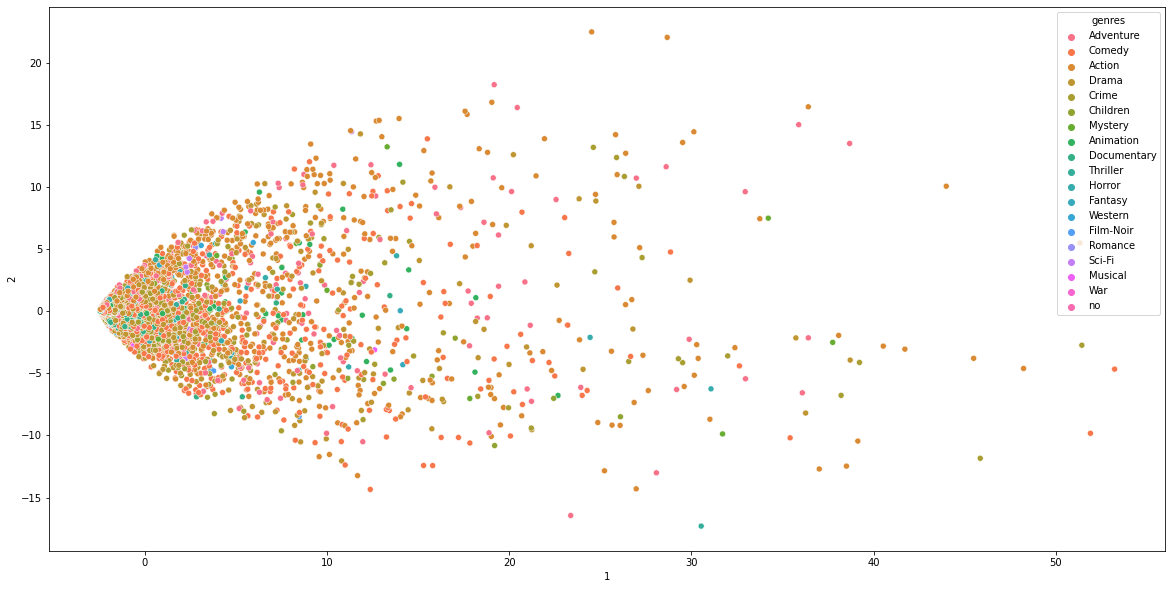

In [6]:
#visualize results for 1st two dimension
plt.figure(figsize=(20, 10))
sns.scatterplot(x='1', y='2', hue='genres', data=df_trans)
plt.show()

In [7]:
df_trans

,1,2,genres
0,36.088963,-6.566611,Adventure
1,18.255223,-0.545658,Adventure
2,5.905737,-5.712351,Comedy
3,-1.976615,-0.808724,Comedy
4,3.563325,-2.674360,Comedy
...,...,...,...
9737,-2.411564,0.182038,Action
9738,-2.415015,0.162221,Animation
9739,-2.415015,0.162221,Drama
9740,-2.415015,0.162221,Action


According to the plot above, data is scattered based on center zero. but I couldn't find the trends in each genres.   

(d) Determine the “intrinsic” dimensionality of the movies, by finding the number of principle components that are needed to explain 80% of the variance of the data. Discuss
how this compares to k = 2 and how this may impact the quality of the visualization
above.

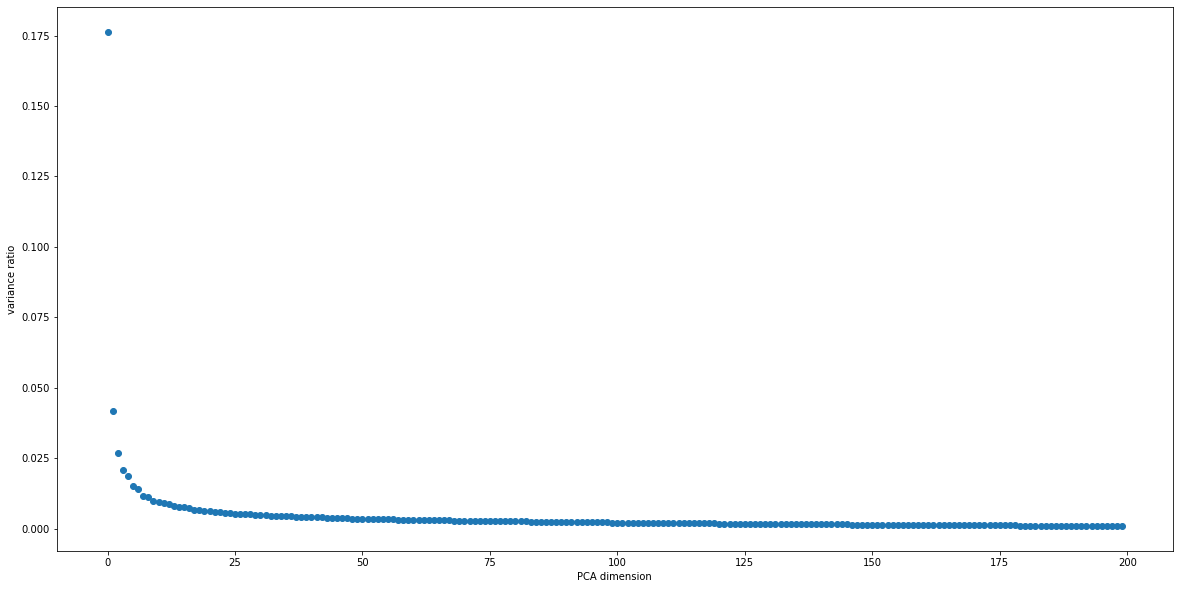

In [13]:
pca = decomposition.PCA(n_components=200)
pca.fit(x_scaled)
plt.figure(figsize=(20, 10))
plt.scatter(range(0, 200), pca.explained_variance_ratio_)
plt.xlabel('PCA dimension')
plt.ylabel('variance ratio')
plt.show()

In [14]:
tmp_pca = pca.explained_variance_ratio_
percent = 0
for i in range(0, 200):
    percent += tmp_pca[i]
    if percent > 0.8:
        print('the number of principle components that are needed to explain 80% of the variance of the data')
        print(i)
        break

the number of principle components that are needed to explain 80% of the variance of the data
152


Accoring to the scatter plot, we can 2 dimension scatter plot. it is very intuitive.
Also, the third variance ration is lower than 0.025. it is very small value to explain the data. 
So, why we use 2 dimensions is the inconvenience to analysis the scatter plot in so many dimension is bigger than benefit by using additional variance ratio.
as a result, it is appropriate to determine that main component is 2.

3 Clustering (15 pts)
Apply k-means clustering to the data from Q1 (rows=users, columns=movies, no meancentering) and cluster the users.


(a) For values of k = [2, 4, 8, 16, 32], apply k-means and measure the inertia for each
value of k. Plot the resulting inertia scores for each choice of k.


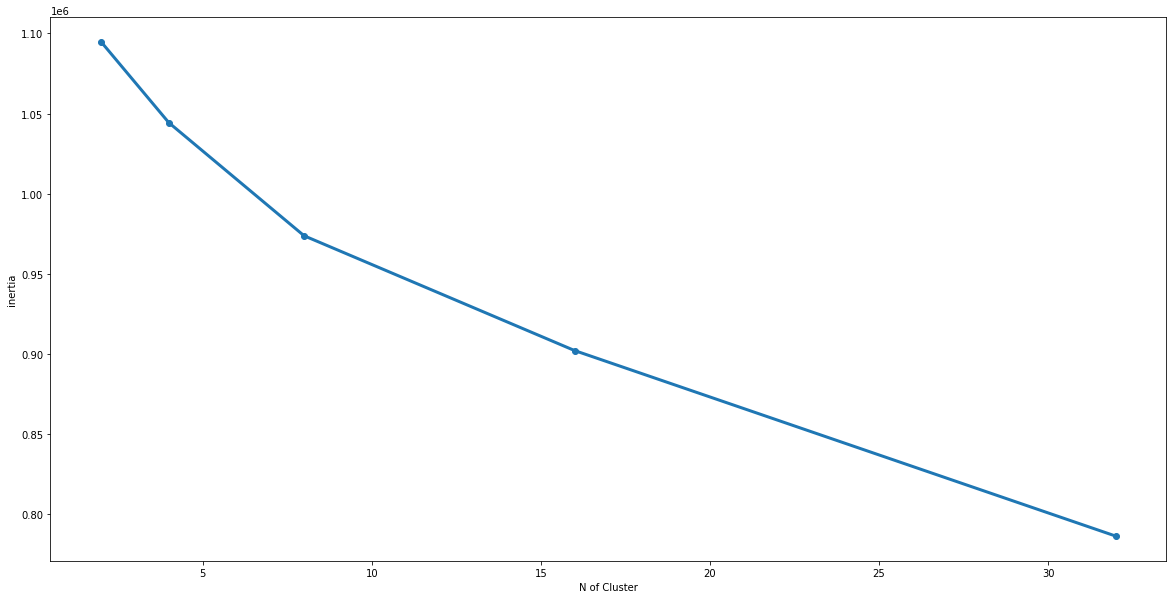

In [8]:

df3 = df2.T
tmp = [2, 4, 8, 16, 32]
sse = []
for i in tmp:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
plt.plot(tmp, sse, linestyle='-', linewidth=3, marker='o')
plt.xlabel('N of Cluster')
plt.ylabel('inertia')
plt.show()

(b) From the above results, choose an appropriate value of k from the plot and support
your choice.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


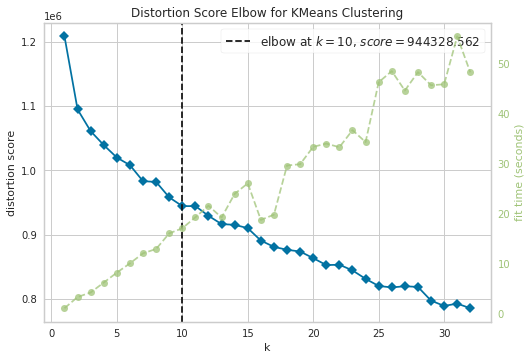

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visual = KElbowVisualizer(model, k=(1, 33))
visual.fit(df3)
visual.show()

In [25]:
# silhouette_score
from sklearn.metrics import silhouette_score
k_range = [2, 4, 8, 16, 32]
best_n = -1
best_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df3)
    clusters = kmeans.predict(df3)
    
    score = silhouette_score(df3, clusters)
    print('k: ', k, 'score: ', score)
    
    if score > best_score:
        best_n = k
        best_score = score
print('best n : ', best_n, 'best score : ', best_score)

k:  2 score:  0.3889938733652906
k:  4 score:  0.2753482805014514
k:  8 score:  -0.011095582981822281
k:  16 score:  0.003991463804035001
k:  32 score:  -0.003015985406670942
best n :  2 best score :  0.3889938733652906


above the first graph, I can't find clear elbow point. So, I can make decision to select the optimal number of clusters.
so I use the library yellobrick of KElbowVisualizer and silhouette score 

we can see the optimal k number by using KElbowVIsualizer. that is 10. the black point line designate the optimal k number but in this case, we select 8 or 16.

also, I found the optimal number using silhouette score. it shows that the number is 2. 

I think 8 is the optimal k number.I checked the optimal number by two ways to find the optimal number of clusters. but in silhouette score, 2 is too small and it doesn't make sense in elbow method. also, 16 is bigger than 10. and according to the KElbow' plot, disadvantage of the fit-time for 16 cluster is bigger than the benefit of 16 cluster. so, I select the optimal number of k "8"

8 is the optimal number of k clustering. 

(c) Cluster the data again with your chosen value of k. For each of the resulting clusters,
find the top three movies that are highest rated (on average) by the users in the cluster.
Report the movie titles and discuss whether the results seem reasonable (i.e., do the
top-rated movies in each cluster seem to correspond to recognizable groups).

In [25]:
df3 = df2.T
kmeans = KMeans(n_clusters=8)
kmeans.fit(df3)
y_kmeans = kmeans.predict(df3)

In [10]:
tmp = pd.DataFrame(y_kmeans)
tmp.index = [i for i in range(1, 611)]
df3_c = df3
df3_c['cluster'] = tmp
df3_c

,1,2,3,4,5,6,7,8,9,10,...,193567,193571,193573,193579,193581,193583,193585,193587,193609,cluster
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
609,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [11]:
df_movie = pd.read_csv('movies.csv')
for i in range (0, 8):
    df_tmp = df3_c[df3_c['cluster']==i]
    mean = df_tmp.mean(axis=0)
    mean = mean.iloc[:-1]
    mean = mean.sort_values(ascending=False)
    top_movie_list = mean.index[0:3]
    print("In %d cluster, 3 top movies\n" % (i+1) )
    for j in range(0, 3):
        print("%d. %s\n"% (j+1, df_movie[df_movie['movieId']==int(top_movie_list[j])]['title'].iloc[0])) 
    print()

In 1 cluster, 3 top movies

1. How to Train Your Dragon (2010)

2. Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)

3. Pirates of the Caribbean: The Curse of the Black Pearl (2003)


In 2 cluster, 3 top movies

1. Pulp Fiction (1994)

2. Fight Club (1999)

3. Matrix, The (1999)


In 3 cluster, 3 top movies

1. Star Wars: Episode IV - A New Hope (1977)

2. Star Wars: Episode V - The Empire Strikes Back (1980)

3. Matrix, The (1999)


In 4 cluster, 3 top movies

1. Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)

2. 2001: A Space Odyssey (1968)

3. Reservoir Dogs (1992)


In 5 cluster, 3 top movies

1. Matrix, The (1999)

2. Shawshank Redemption, The (1994)

3. Forrest Gump (1994)


In 6 cluster, 3 top movies

1. Beauty and the Beast (1991)

2. Dead Again (1991)

3. Much Ado About Nothing (1993)


In 7 cluster, 3 top movies

1. Apollo 13 (1995)

2. Forrest Gump (1994)

3. Braveheart (1995)


In 8 cluster, 3 top mo

as you see, the top three movies are simliar to each clusters. there are starwars and matrix and so on. but there are also different result in the clusters. maybe it was affected by user's ratings which means there are people who didn't rate each movies and the rows clustered by the ratings and it makes some group according to some trend. as a result, it seems reliable result in each group. 

4 Singular Value Decomposition (15 pts)

Apply SVD to the user-movie matrix from Q1 (rows=users, columns=movies, no meancentering).

In [6]:
df4 = df2.T
df4

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(a) Apply SVD with number of components k = 32. Plot the resulting singular values

In [7]:
mat = np.array(df4).astype(np.float64)
U, S, Vt = np.linalg.svd(mat, full_matrices=True)

singular values of df when the number of components is 32
[534.41989777 231.23661142 191.1508762  170.42250831 154.552948
 147.33575651 135.65556768 122.66302989 121.44217651 113.11144323
 109.60313933 107.93266172 105.97376877 102.05675293  99.87323589
  99.28999246  97.11713355  93.40879296  92.32408574  90.97607986
  90.42515264  88.83466993  87.29627026  86.05702164  85.15393734
  83.04476272  82.40743887  81.73690785  80.86997674  79.52408732
  79.16948319  78.84651534]

using TruncatedSVD
[534.41989777 231.23661141 191.15087615 170.42250781 154.5529437
 147.33575113 135.65553853 122.66273152 121.44202603 113.10954299
 109.60196712 107.92898167 105.96872208 102.04826765  99.85464587
  99.27316769  97.07469052  93.34168388  92.24674707  90.89579811
  90.31779753  88.68546632  86.90906113  85.8183498   84.87462334
  82.66920985  81.45900934  81.13550251  80.13805949  78.89689287
  78.13848732  77.44948934]


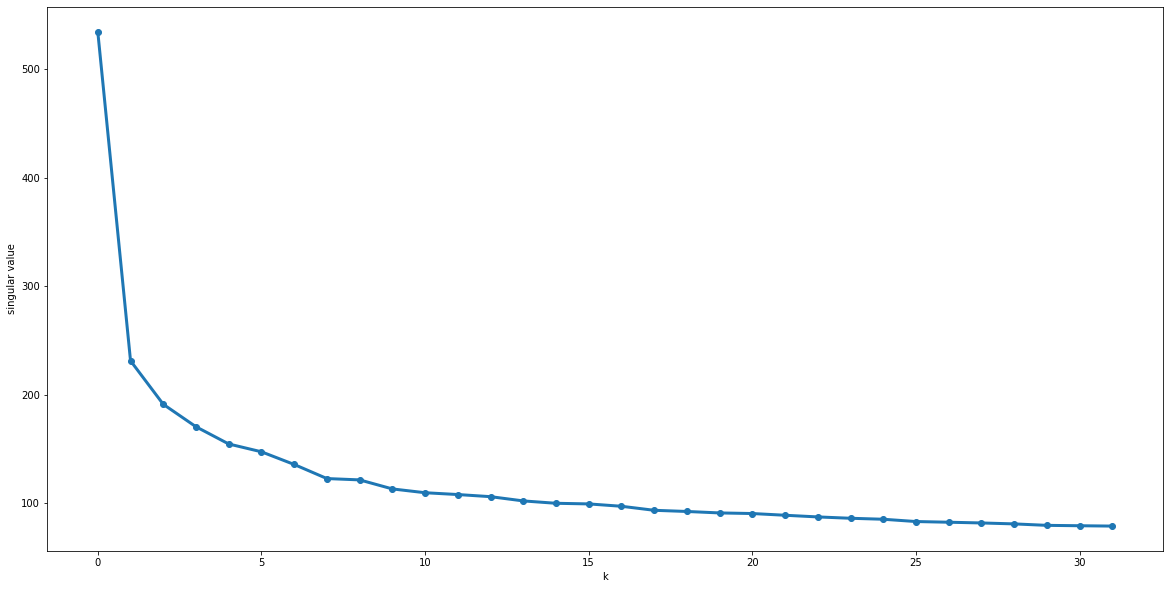

In [8]:
print("singular values of df when the number of components is 32")
print(S[:32])
print()

tsvd = TruncatedSVD(n_components=32)
tsvd.fit(mat)
print('using TruncatedSVD')
print(tsvd.singular_values_)

plt.figure(figsize=(20, 10))
plt.plot(S[:32], linestyle='-', linewidth=3, marker='o')
plt.xlabel('k')
plt.ylabel('singular value')
plt.show()

(b) For each of the values of k = [2, 4, 8, 16, 32] considered above, report the sum of the
explained variance ratio. Discuss how the results compare to the inertia values
above and whether it supports your choice of k.


the values of k is 2
0.054294852345729616
the values of k is 4
0.07098893366520567
the values of k is 8
0.08766074268932679
the values of k is 16
0.11212120801536925
the values of k is 32
0.14467577470715506


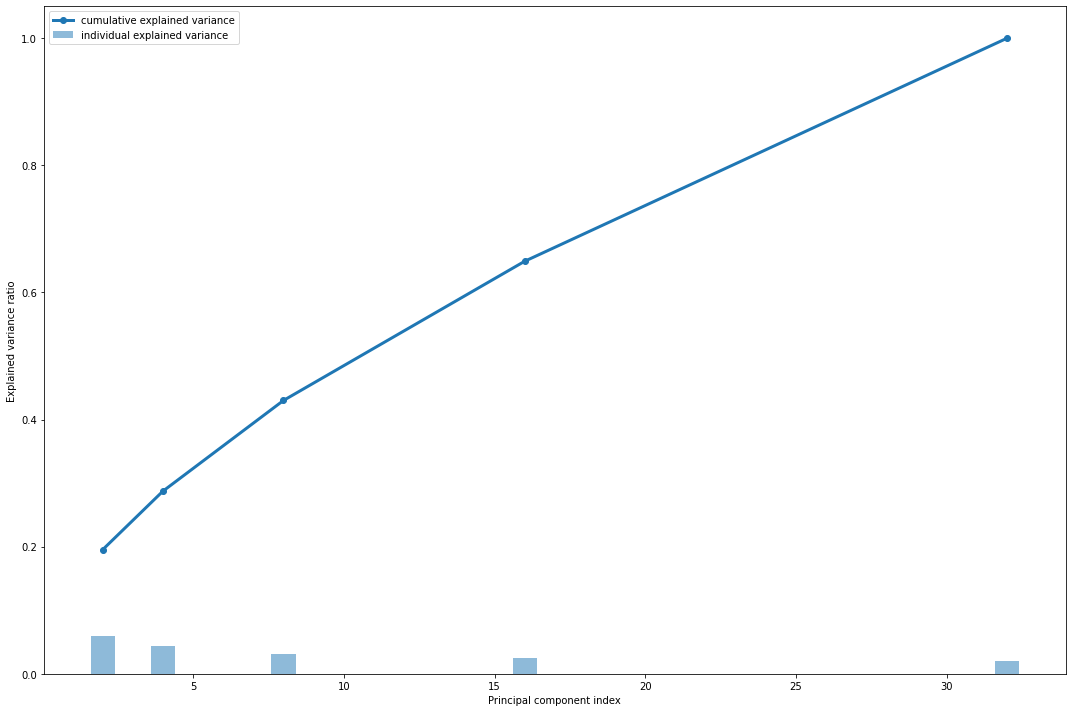

In [19]:
eig = S[:32]
tot = sum(eig)
var_exp = [(i / tot) for i in sorted(eig, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

tmp = [2, 4, 8, 16, 32]
evr = []
cum_evr = []
for i in tmp:
    evr.append(var_exp[i-1])
    cum_evr.append(cum_var_exp[i-1])
    
plt.figure(figsize=(15, 10))
plt.bar(tmp, evr, alpha=0.5, align='center',
        label='individual explained variance')
plt.plot(tmp, cum_evr,  linewidth=3, marker='o',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

the number of k is 2
0.17282703876353836
the number of k is 4
0.22186816069555254
the number of k is 8
0.28703941997809385
the number of k is 16
0.36343028293392066
the number of k is 32
0.4611249274231522


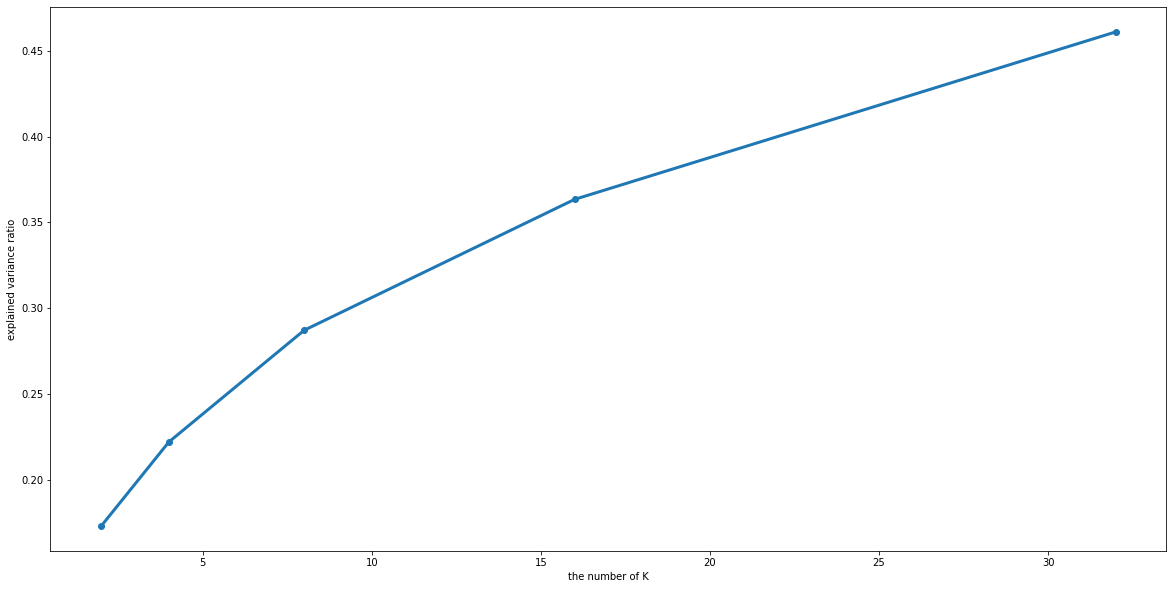

In [21]:
tmp = [2, 4, 8, 16, 32]
evr = []
for i in tmp:
    tsvd = TruncatedSVD(n_components=i)
    tsvd.fit(mat)
    print("the number of k is %d" % i)
    print(tsvd.explained_variance_ratio_.sum())
    evr.append(tsvd.explained_variance_ratio_.sum())
    
plt.figure(figsize=(20, 10))
plt.plot(tmp, evr, linestyle='-', linewidth=3, marker='o')
plt.xlabel('the number of K')
plt.ylabel('explained variance ratio')
plt.show()

explained variance ratio means that the ratio of the variance of the result projected onto the axis of each principal component vectors. 

According to the plots above, it seems like upset inertia plot. So, we can select the number of k by using elbow method. 

In problem 3, I selected K as 8. So, In this case using explained variance ratio, I select K as 8. 

(c) Apply SVD with k = 2 and transform the data.

In [26]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(mat)

TruncatedSVD()

In [27]:
mat = np.array(df4).astype(np.float64)
U, S, V = np.linalg.svd(mat, full_matrices=True)

S_tmp = np.zeros(mat.shape)
for i in range(2):
    S_tmp[i][i] = S[i]
    
S_2 = np.dot(U, np.dot(S_tmp, V))
print(S_2)

[[ 2.48508920e+00  1.17367674e+00  8.24903974e-01 ... -6.60192034e-03
  -6.60192034e-03 -1.00780370e-02]
 [ 1.07696687e-01  1.12346853e-01 -5.14816689e-02 ...  2.65385298e-03
   2.65385298e-03  6.07062162e-03]
 [ 6.41468416e-02  2.88599463e-02  2.33300837e-02 ... -2.39070058e-04
  -2.39070058e-04 -4.12107558e-04]
 ...
 [ 4.44727326e+00  2.39717657e+00  1.05516315e+00 ...  2.37679797e-03
   2.37679797e-03  1.33762544e-02]
 [ 3.73311702e-01  1.62694916e-01  1.43235034e-01 ... -1.64280586e-03
  -1.64280586e-03 -2.95500219e-03]
 [ 3.93828293e+00  2.76346804e+00  2.54634883e-02 ...  3.27389290e-02
   3.27389290e-02  7.96516540e-02]]


In [73]:
df4_c = S_2[:, :2]

(610, 2)

(d) Plot the results (for k = 2) and color the users by the cluster memberships you found
above. Discuss any patterns you can see and compare them to the previous analysis
(either from clustering or PCA).

In [82]:
y_kmeans = y_kmeans.reshape(610, 1)
y_kmeans = np.array(y_kmeans, dtype=int)
df4_d = np.hstack([df4_c, y_kmeans])

In [80]:
df_tmp = pd.DataFrame(df4_d)
df_tmp.index = [str(i+1) for i in range(0, 610)]
df_tmp.columns = ['dim_1', 'dim_2', 'cluster']

df_tmp['cluster']

1      3.0
2      1.0
3      1.0
4      1.0
5      6.0
      ... 
606    0.0
607    3.0
608    5.0
609    6.0
610    5.0
Name: cluster, Length: 610, dtype: float64

<Figure size 1152x720 with 0 Axes>

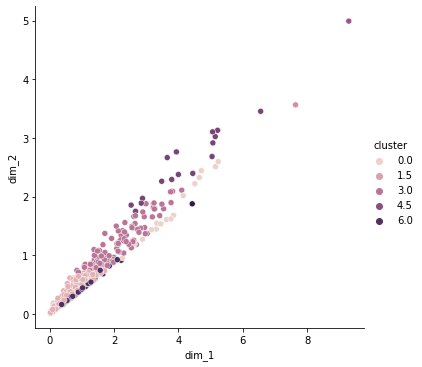

In [81]:
plt.figure(figsize=(16, 10))
ax = sns.relplot(x=df_tmp.dim_1, y=df_tmp.dim_2, hue=df_tmp.cluster)
plt.show()

According to the plot above, there is some problem when using scatter plot. In 2, 4, 7 clusters, there is just one row. so, seaborn scatter plot makes pair 1 and 2, 4 and 5, 6 and 7. So scatter plot just shows 5 clusters. that means, the number of k is wrong. it maybe better selecting 5. 

Comparing to scatter plot using cluster, they are similar to each other even though they used tranposed data. but in cluster, I transformed the data as mean center. In SVD, I didn't, So, in that point, if I transform the data as mean center, the plot show more similar result with cluster.  